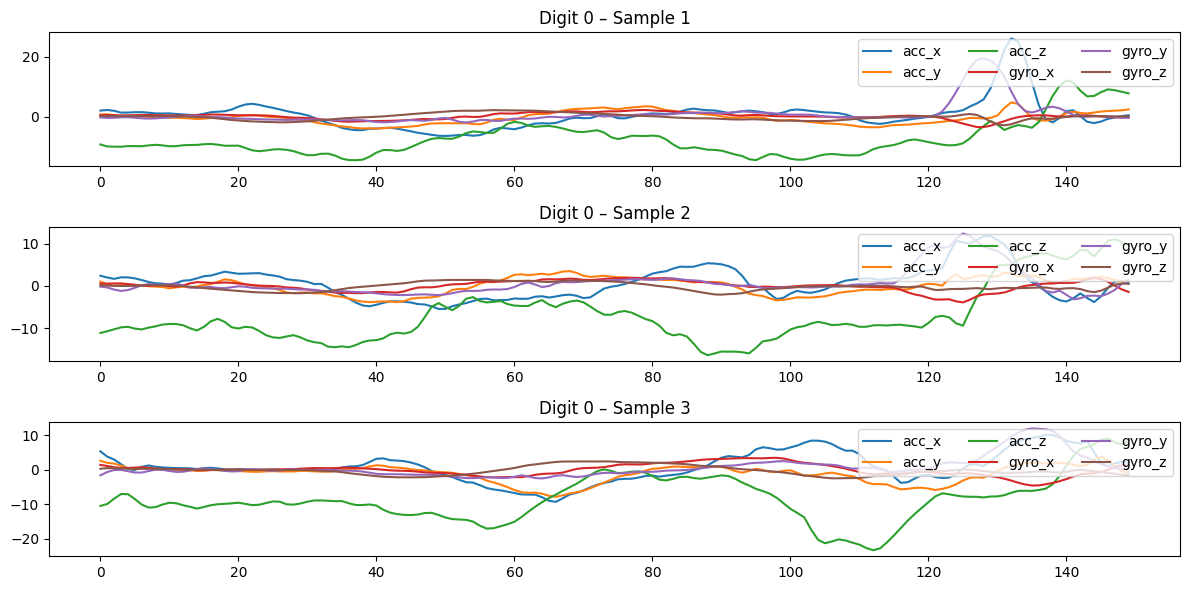

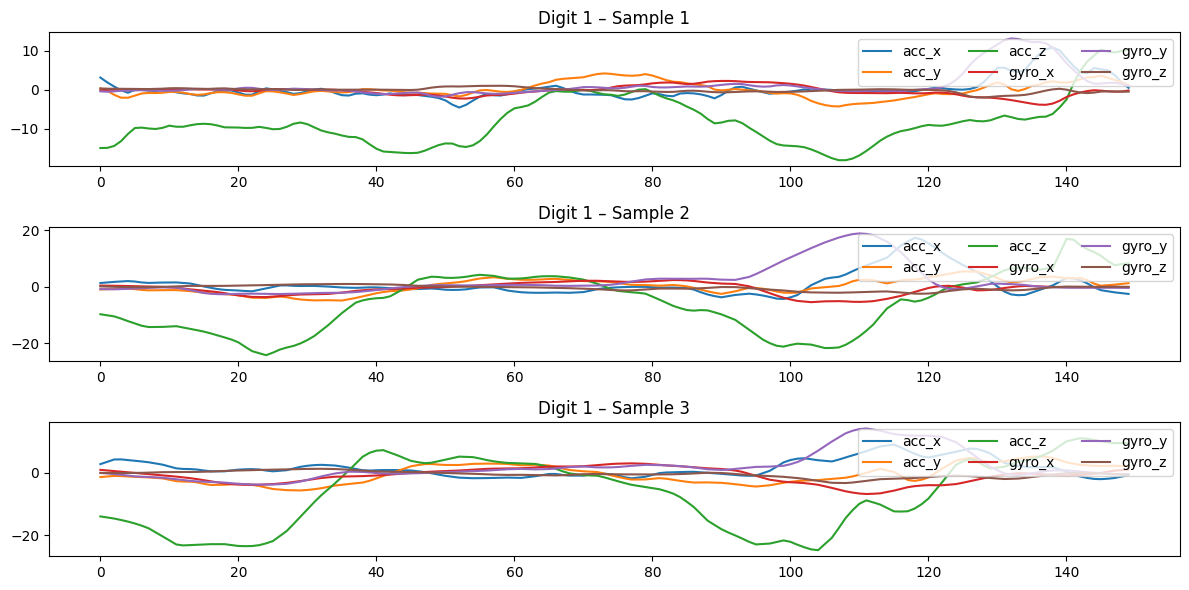

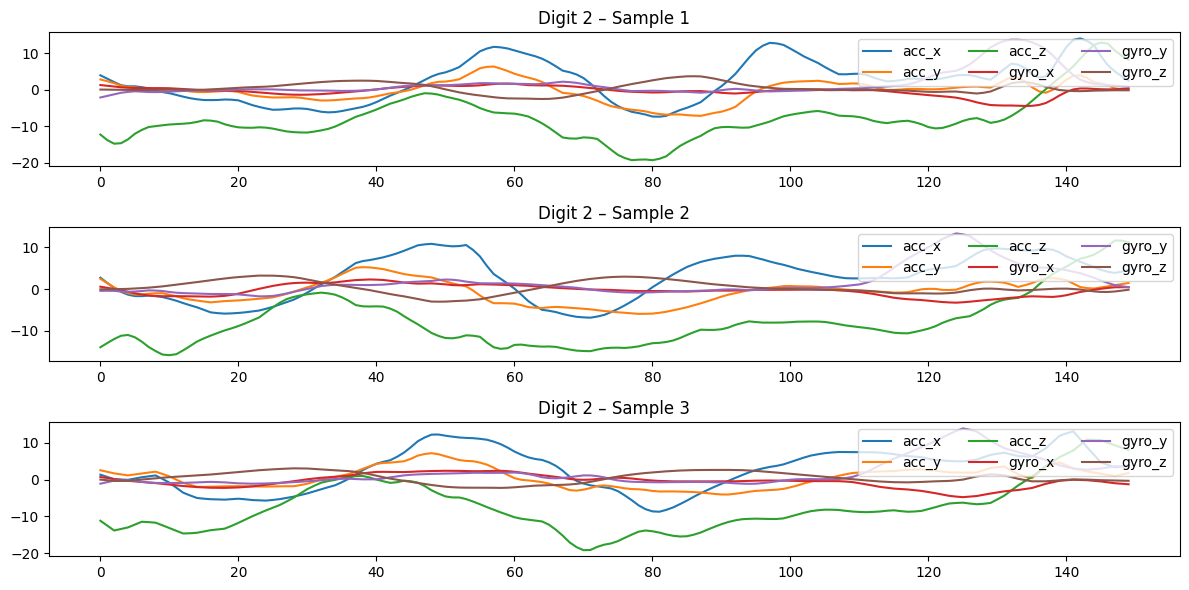

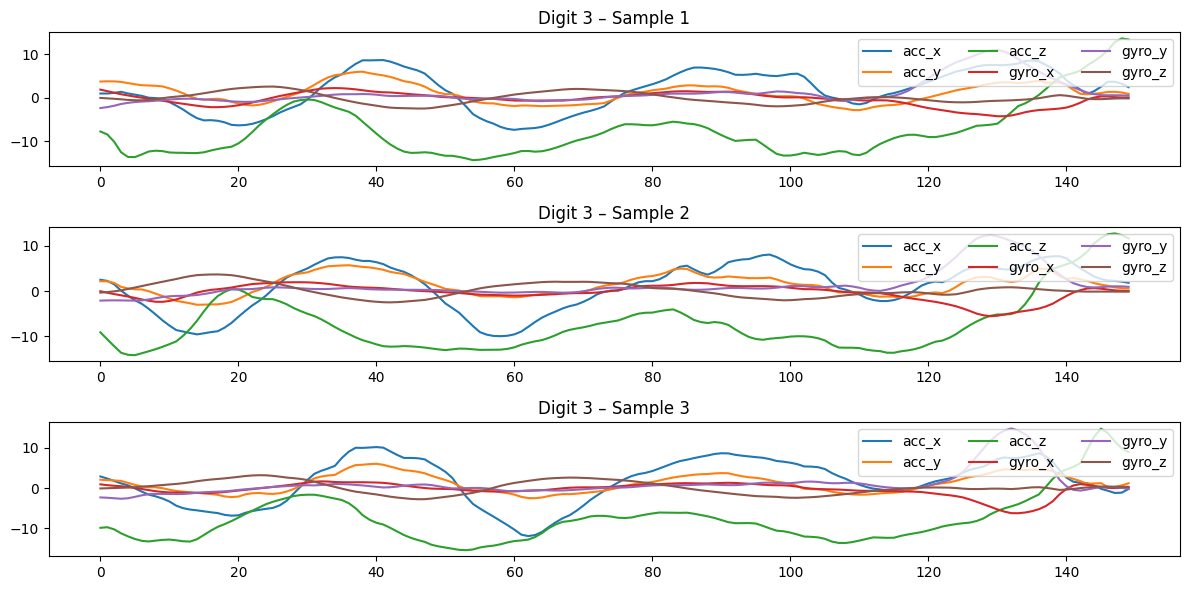

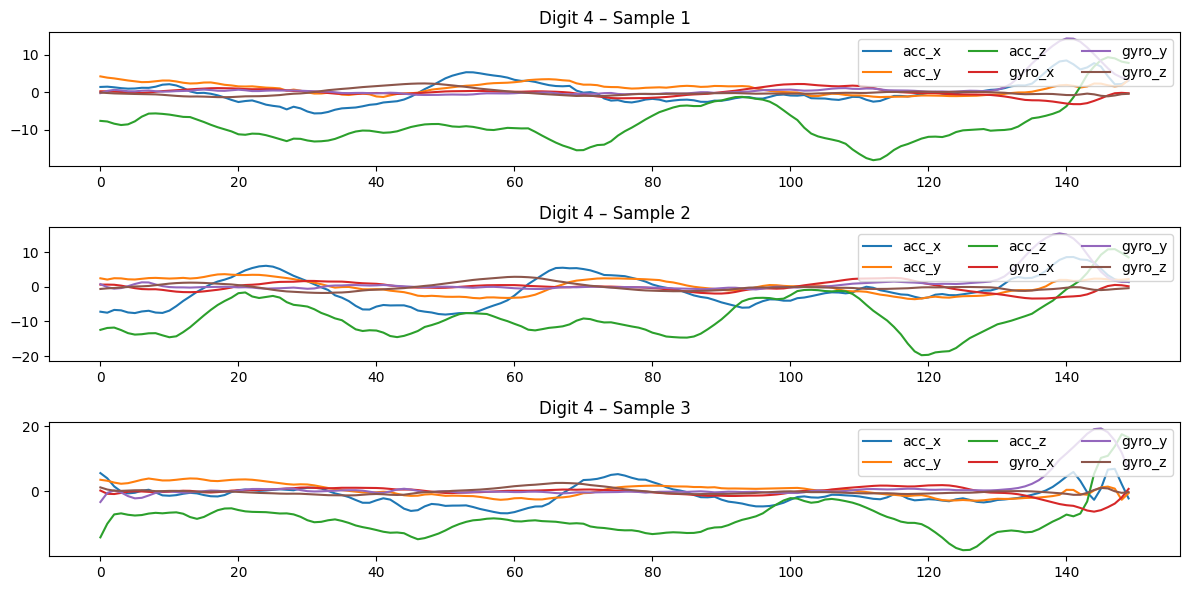

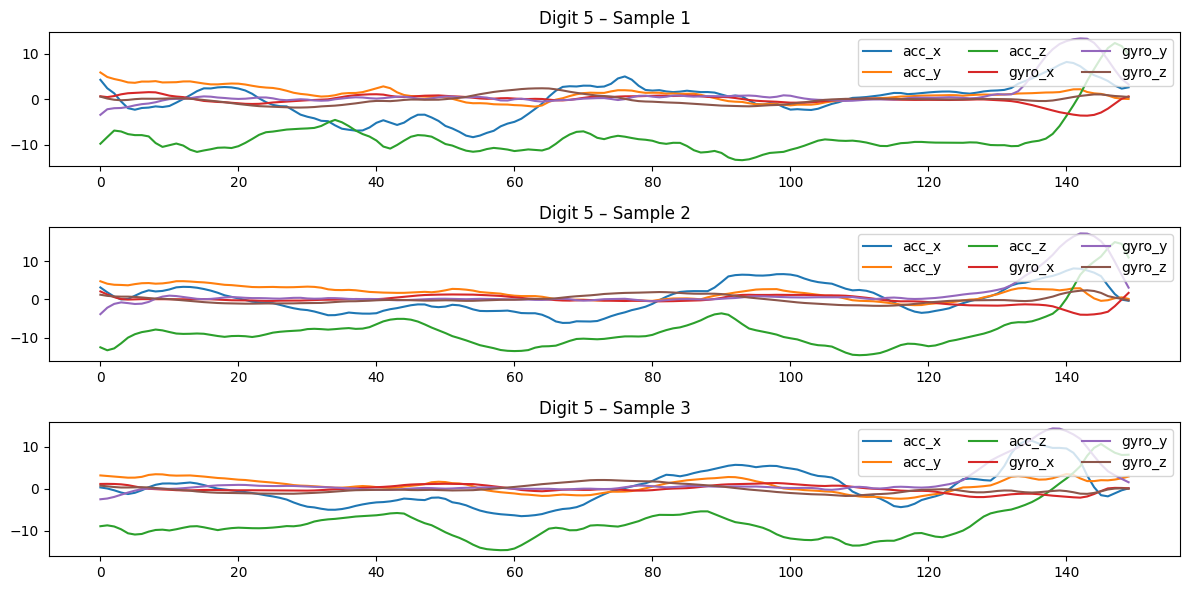

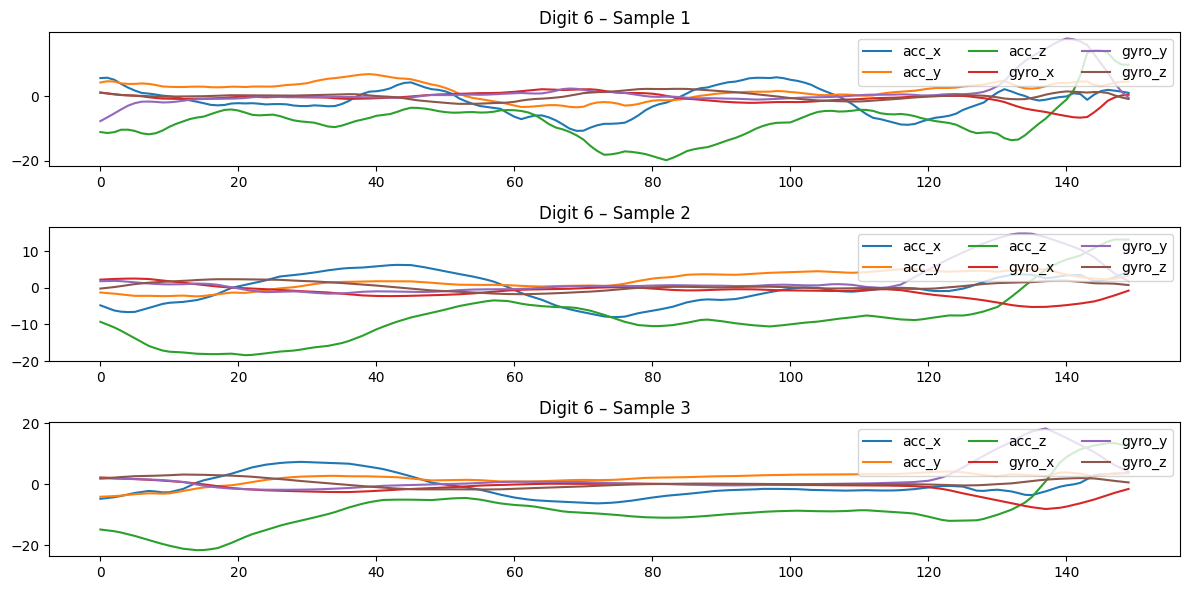

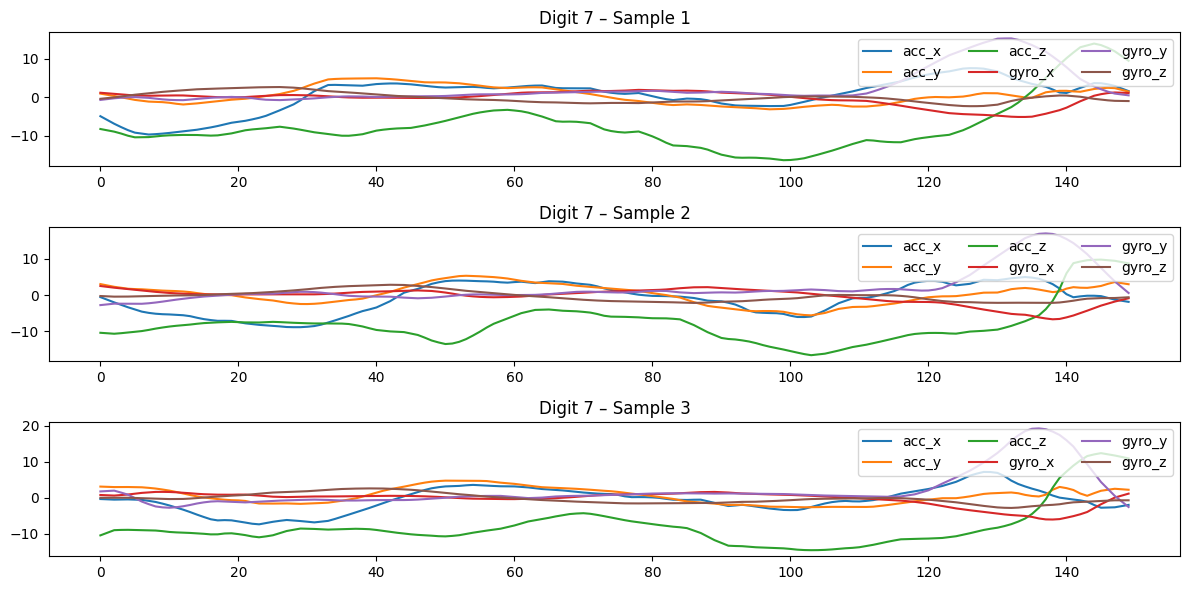

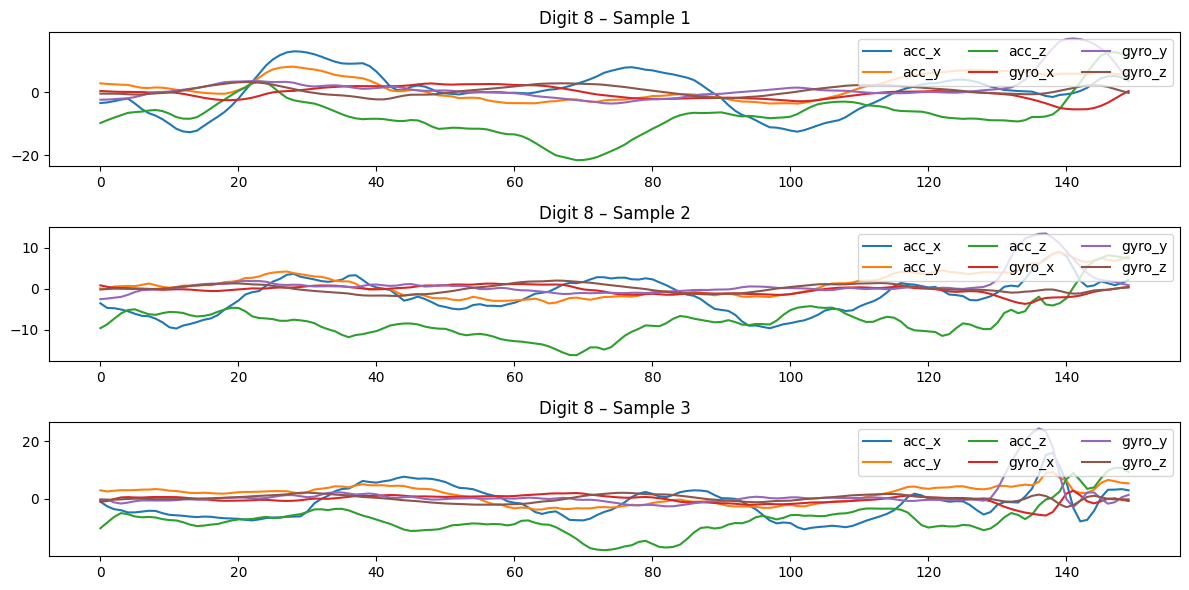

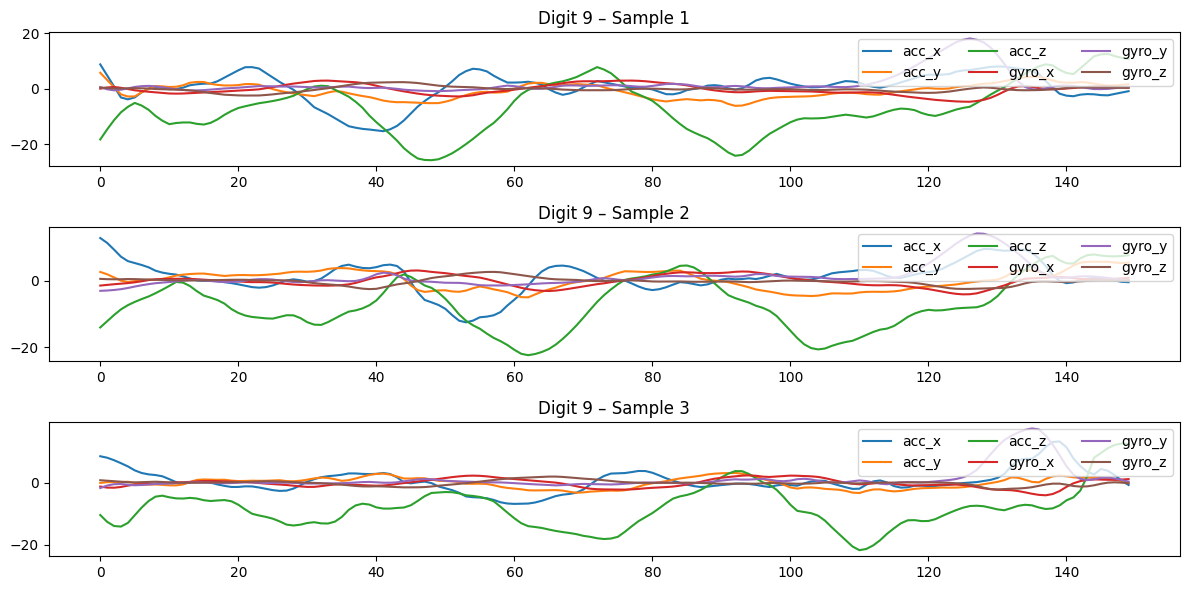

In [5]:
import numpy as np
import matplotlib.pyplot as plt


# =========================
# LOAD DATA
# =========================
X = np.load("../processed/X.npy")   # (N, 150, 6)
y = np.load("../processed/y.npy")   # (N,)

SENSOR_NAMES = ["acc_x", "acc_y", "acc_z", "gyro_x", "gyro_y", "gyro_z"]

# =========================
# VISUALIZE FUNCTION
# =========================
def plot_digit_samples(digit, samples=3):
    idxs = np.where(y == digit)[0][:samples]

    plt.figure(figsize=(12, 6))
    for i, idx in enumerate(idxs):
        plt.subplot(samples, 1, i + 1)
        for c in range(6):
            plt.plot(X[idx][:, c], label=SENSOR_NAMES[c])
        plt.title(f"Digit {digit} – Sample {i+1}")
        plt.legend(loc="upper right", ncol=3)

    plt.tight_layout()
    plt.show()

# =========================
# RUN CHECK
# =========================
plot_digit_samples(digit=0, samples=3)
plot_digit_samples(digit=1, samples=3)
plot_digit_samples(digit=2, samples=3)
plot_digit_samples(digit=3, samples=3)
plot_digit_samples(digit=4, samples=3)
plot_digit_samples(digit=5, samples=3)
plot_digit_samples(digit=6, samples=3)
plot_digit_samples(digit=7, samples=3)
plot_digit_samples(digit=8, samples=3)
plot_digit_samples(digit=9, samples=3)


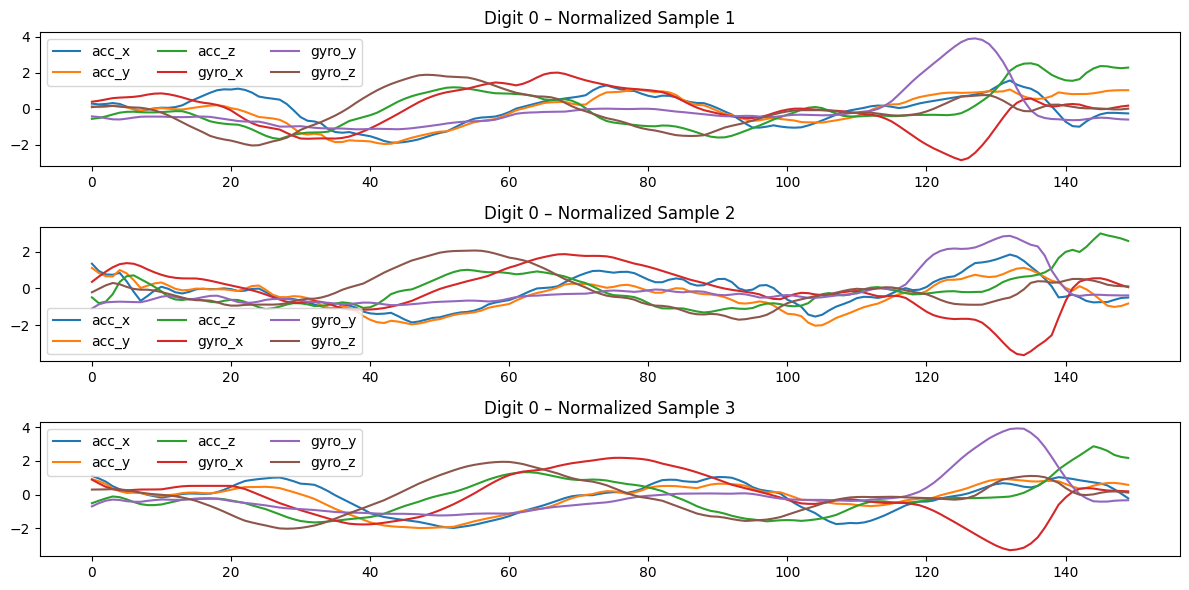

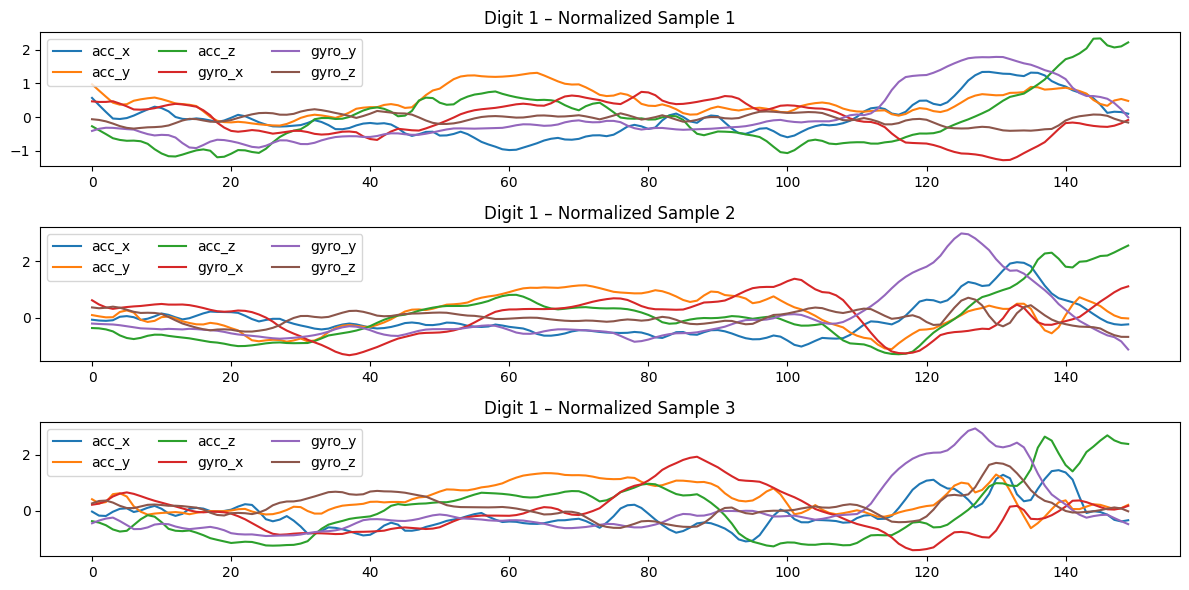

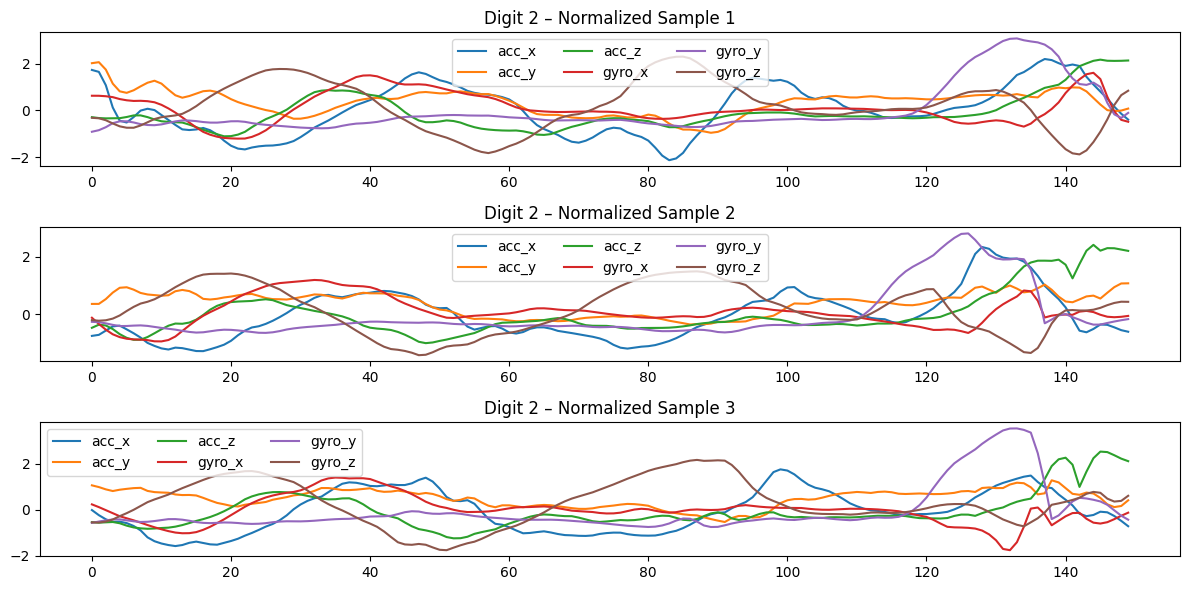

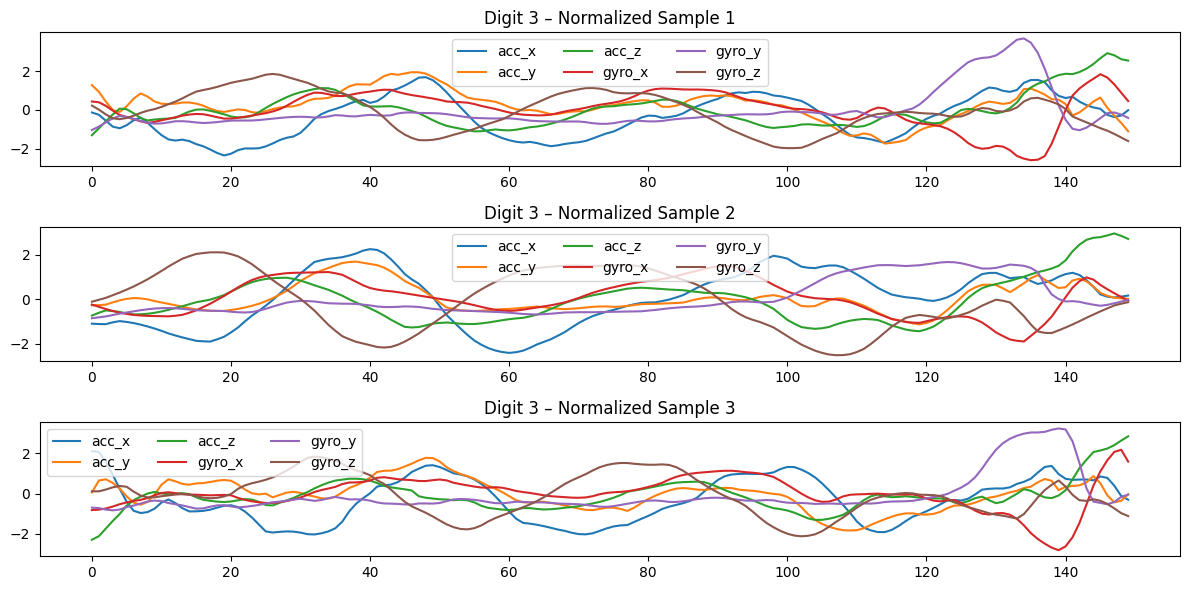

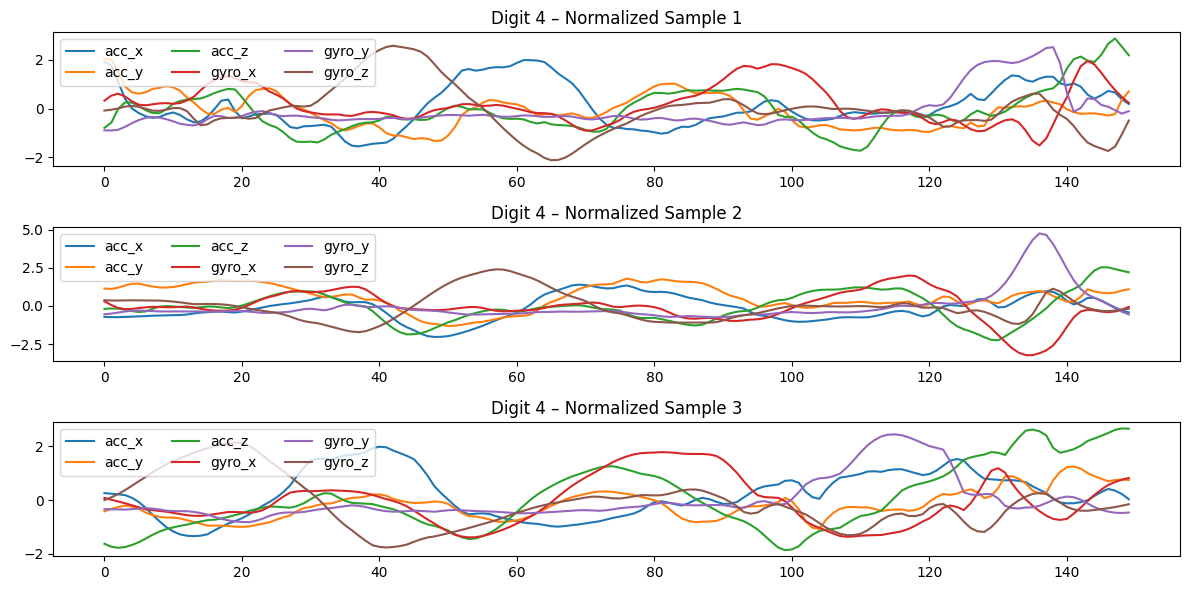

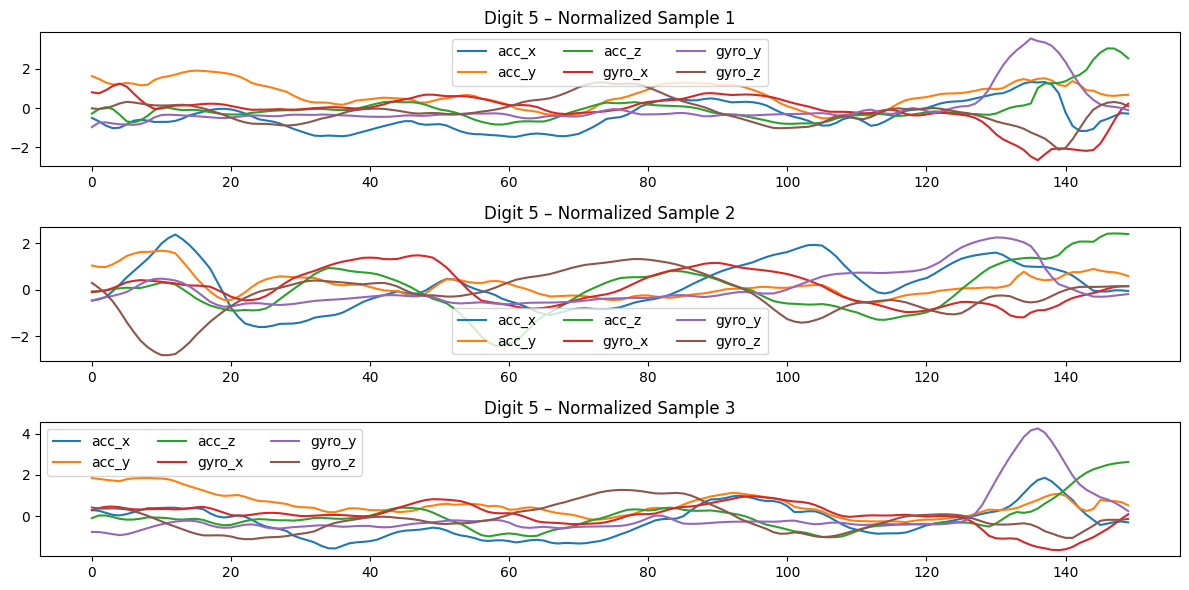

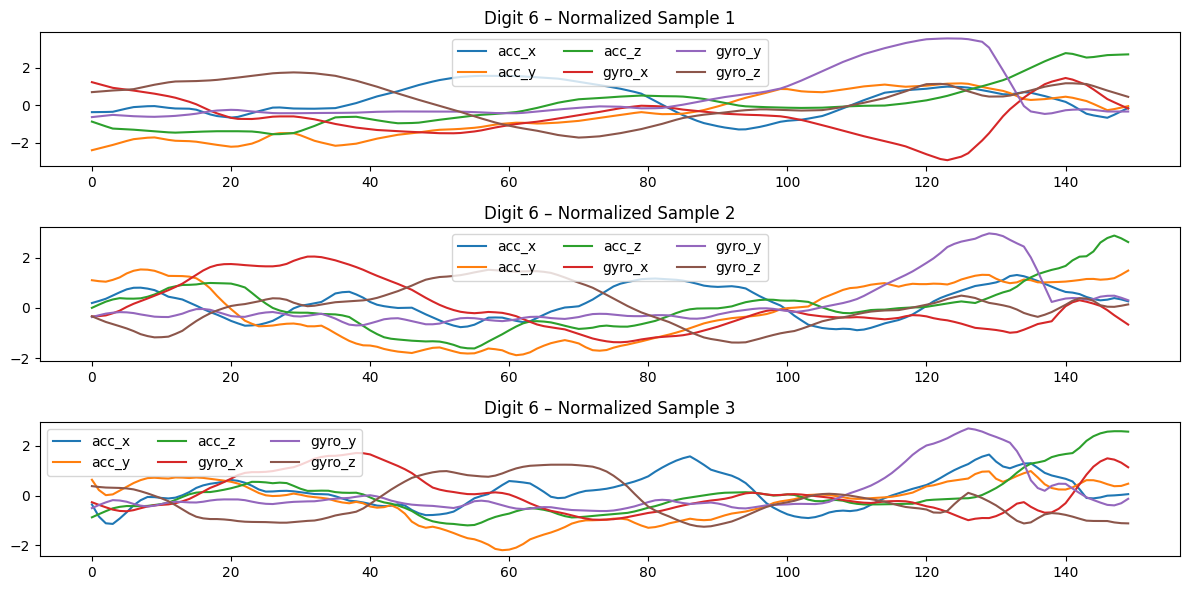

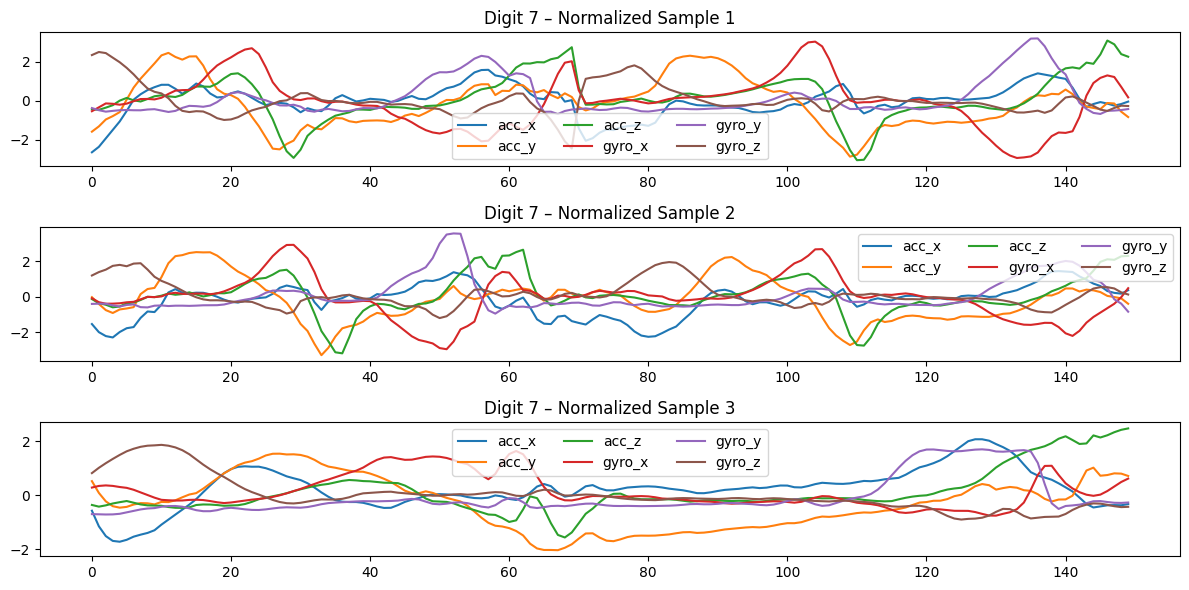

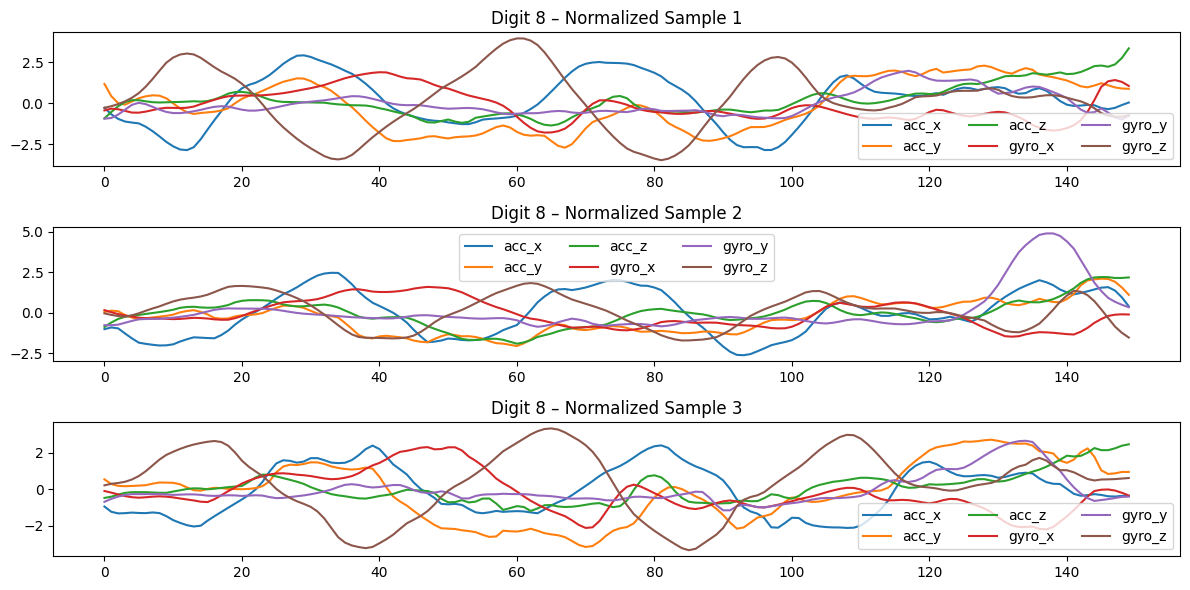

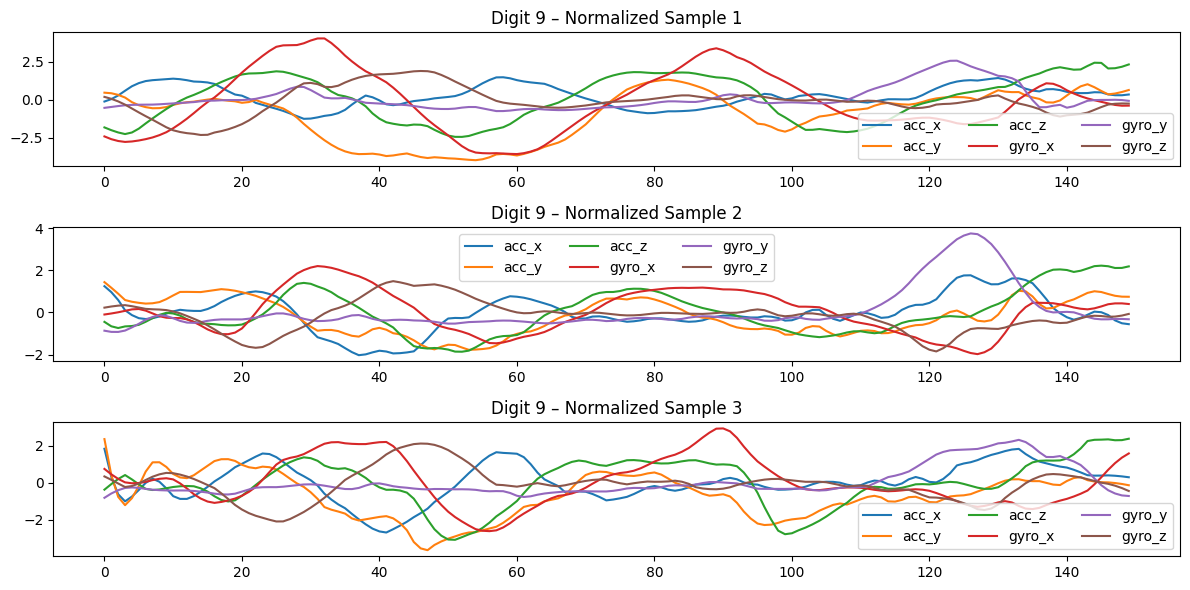

In [8]:
import numpy as np
import matplotlib.pyplot as plt

X = np.load("../processed/X_train.npy")
y = np.load("../processed/y_train.npy")

SENSOR_NAMES = ["acc_x", "acc_y", "acc_z", "gyro_x", "gyro_y", "gyro_z"]

def plot_normalized_digit(digit, samples=3):
    idxs = np.where(y == digit)[0][:samples]

    plt.figure(figsize=(12, 6))
    for i, idx in enumerate(idxs):
        plt.subplot(samples, 1, i + 1)
        for c in range(6):
            plt.plot(X[idx][:, c], label=SENSOR_NAMES[c])
        plt.title(f"Digit {digit} – Normalized Sample {i+1}")
        plt.legend(ncol=3)

    plt.tight_layout()
    plt.show()

plot_normalized_digit(0)
plot_normalized_digit(1)
plot_normalized_digit(2)
plot_normalized_digit(3)
plot_normalized_digit(4)
plot_normalized_digit(5)
plot_normalized_digit(6)
plot_normalized_digit(7)
plot_normalized_digit(8)
plot_normalized_digit(9)


In [1]:
import numpy as np

X_train = np.load("../processed/X_train.npy")   # (N, 150, 6)
X_val   = np.load("../processed/X_test.npy")
y_train = np.load("../processed/y_train.npy")
y_val   = np.load("../processed/y_test.npy")

num_classes = len(np.unique(y_train))


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv1D, MaxPooling1D, BatchNormalization,
    Dense, Dropout, Flatten
)

model = Sequential([
    Conv1D(32, kernel_size=5, activation="relu",
           input_shape=(150, 6)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),

    Conv1D(64, kernel_size=5, activation="relu"),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),

    Conv1D(128, kernel_size=3, activation="relu"),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),

    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),

    Dense(num_classes, activation="softmax")
])


d:\Learn\Guvi\DS\project\Air Gesture\air_env\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):
d:\Learn\Guvi\DS\project\Air Gesture\air_env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [3]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 146, 32)        │           992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 146, 32)        │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 73, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 69, 64)         │        10,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 69, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 34, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 32, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 16, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 300,458 (1.15 MB)

 Trainable params: 300,010 (1.14 MB)

 Non-trainable params: 448 (1.75 KB)

In [4]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=32,
    verbose=1
)

Epoch 1/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8667 - loss: 0.5112 - val_accuracy: 0.9733 - val_loss: 0.5074
Epoch 2/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9742 - loss: 0.0867 - val_accuracy: 0.9817 - val_loss: 0.1047
Epoch 3/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9837 - loss: 0.0581 - val_accuracy: 0.9867 - val_loss: 0.0433
Epoch 4/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9925 - loss: 0.0269 - val_accuracy: 0.9883 - val_loss: 0.0359
Epoch 5/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9912 - loss: 0.0261 - val_accuracy: 0.9867 - val_loss: 0.0512
Epoch 6/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9921 - loss: 0.0222 - val_accuracy: 0.9900 - val_loss: 0.0539
Epoch 7/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9921 - loss: 0.0190 - val_accuracy: 0.9867 - val_loss: 0.0504
Epoch 8/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9950 - loss: 0.0179 - val_accuracy: 0.9883 - val_loss

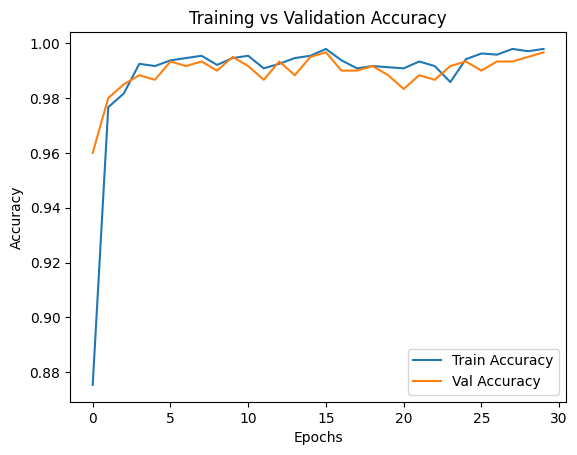

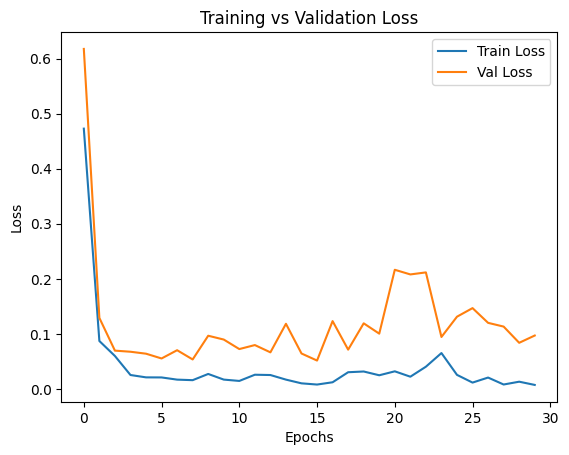

In [14]:
import matplotlib.pyplot as plt

# Accuracy
plt.figure()
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()

# Loss
plt.figure()
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()


In [ ]:
# model.save("air_gesture_cnn.h5")

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


<Figure size 800x800 with 0 Axes>

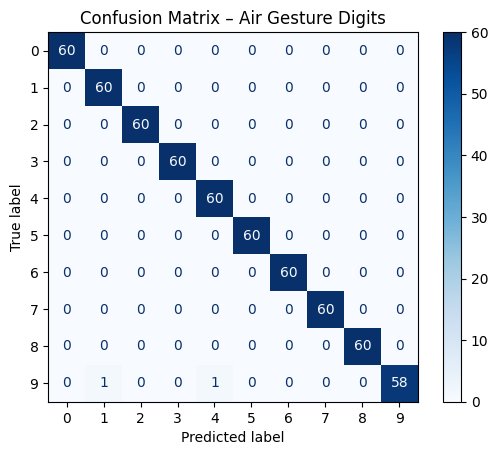

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# predictions
y_pred = np.argmax(model.predict(X_val), axis=1)

# confusion matrix
cm = confusion_matrix(y_val, y_pred)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=[str(i) for i in range(10)]
)

plt.figure(figsize=(8, 8))
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix – Air Gesture Digits")
plt.show()


In [3]:
# CNN + LSTM Hybrid Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv1D, MaxPooling1D, BatchNormalization,
    LSTM, Dense, Dropout
)

model = Sequential([
    # CNN feature extractor
    Conv1D(32, kernel_size=5, activation="relu",
           input_shape=(150, 6)),
    BatchNormalization(),
    MaxPooling1D(2),

    Conv1D(64, kernel_size=5, activation="relu"),
    BatchNormalization(),
    MaxPooling1D(2),

    # Temporal modeling
    LSTM(64, return_sequences=False),

    Dense(64, activation="relu"),
    Dropout(0.5),

    Dense(num_classes, activation="softmax")
])


In [4]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)               │ (None, 146, 32)        │           992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 146, 32)        │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 73, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 69, 64)         │        10,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 69, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 34, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,514 (193.41 KB)

 Trainable params: 49,322 (192.66 KB)

 Non-trainable params: 192 (768.00 B)

In [5]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=32
)


Epoch 1/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.4246 - loss: 1.6778 - val_accuracy: 0.6317 - val_loss: 1.3401
Epoch 2/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7825 - loss: 0.6311 - val_accuracy: 0.8000 - val_loss: 0.5014
Epoch 3/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9017 - loss: 0.3058 - val_accuracy: 0.9367 - val_loss: 0.1647
Epoch 4/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9717 - loss: 0.1481 - val_accuracy: 0.9850 - val_loss: 0.0630
Epoch 5/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9808 - loss: 0.1013 - val_accuracy: 0.9817 - val_loss: 0.0685
Epoch 6/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9862 - loss: 0.0611 - val_accuracy: 0.9883 - val_loss: 0.0476
Epoch 7/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9904 - loss: 0.0482 - val_accuracy: 0.9867 - val_loss: 0.0453
Epoch 8/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9892 - loss: 0.0547 - val_accuracy: 0.9883 - v

In [7]:
model.save("air_gesture_cnn_lstm.h5")

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

model = load_model("../model/air_gesture_cnn_lstm.h5")

X_val = np.load("../processed/X_test.npy")
y_val = np.load("../processed/y_test.npy")


y_pred = np.argmax(model.predict(X_val), axis=1)


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


<Figure size 800x800 with 0 Axes>

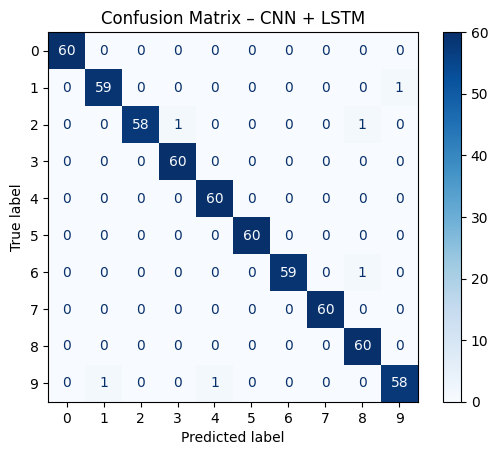

In [11]:
cm = confusion_matrix(y_val, y_pred)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=[str(i) for i in range(10)]
)

plt.figure(figsize=(8, 8))
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix – CNN + LSTM")
plt.show()


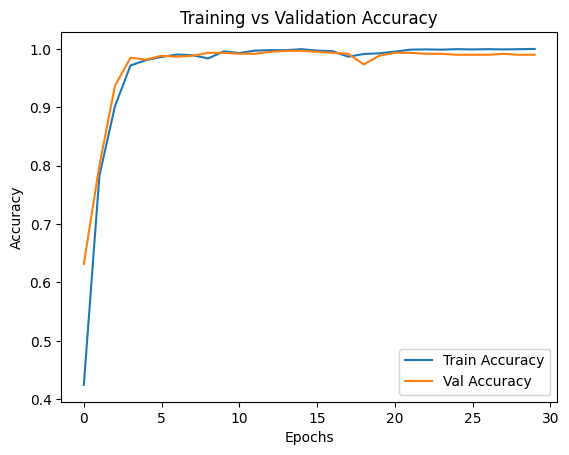

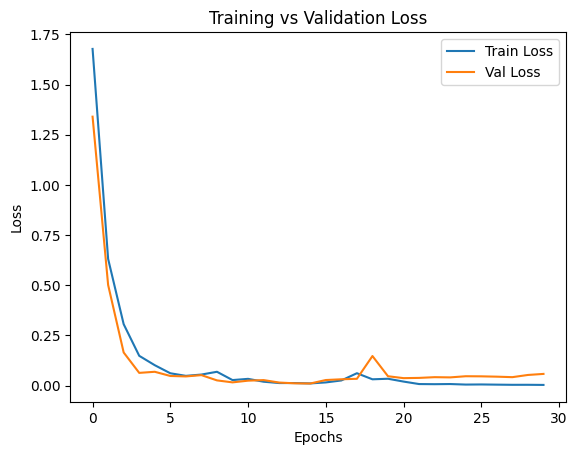

In [12]:
import matplotlib.pyplot as plt

# Accuracy
plt.figure()
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()

# Loss
plt.figure()
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()
